# Simple Data Exploration for Hyrcania Project (Fixed)

**Objective:** Basic exploration of the olive oil spectroscopy dataset

This notebook will:
1. Extract the compressed data
2. Explore the file structure
3. Load and visualize some sample data (with proper encoding handling)
4. Understand the data format and content

In [1]:
# Basic imports for data exploration
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Step 1: Extract the compressed data
data_path = './data'
zip_file = os.path.join(data_path, 'Raw_data.zip')
extract_path = os.path.join(data_path, 'extracted')

# Create extraction directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Data extracted to: {extract_path}")

Data extracted to: ./data/extracted


In [3]:
# Step 2: Explore the file structure
def explore_directory(path, max_depth=3, current_depth=0):
    """Recursively explore directory structure"""
    if current_depth > max_depth:
        return
    
    try:
        items = os.listdir(path)
        for item in items:
            item_path = os.path.join(path, item)
            indent = "  " * current_depth
            
            if os.path.isdir(item_path):
                print(f"{indent}📁 {item}/")
                explore_directory(item_path, max_depth, current_depth + 1)
            else:
                size = os.path.getsize(item_path)
                print(f"{indent}📄 {item} ({size:,} bytes)")
    except PermissionError:
        print(f"{indent}❌ Permission denied: {path}")

print("Directory structure:")
explore_directory(extract_path)

Directory structure:
📁 Aging Step 6/
  📁 Fluorescence/
    📄 20210630_1206_AS6_N0L0I2D0.csv (3,044,057 bytes)
    📄 20210702_1525_AS6_E0F0C1C0.csv (3,850,605 bytes)
    📄 20210630_1454_AS6_Q2O0L2I0.csv (3,880,248 bytes)
    📄 20210630_1329_AS6_F2A2W2T1.csv (3,464,030 bytes)
    📄 20210701_1212_AS6_P1U1H0E1.csv (3,026,094 bytes)
    📄 20210630_1043_AS6_A0V1T2Q0.csv (2,621,028 bytes)
    📄 20210702_1402_AS6_S2P2N2K0.csv (3,437,180 bytes)
    📄 20210701_1459_AS6_J2G1D2B0.csv (3,849,845 bytes)
    📄 20210701_1049_AS6_O1L1J0G0.csv (2,606,601 bytes)
    📄 20210702_1110_AS6_M0S1M2U2.csv (2,608,786 bytes)
    📄 20210701_0802_AS6_G2D1A1W0.csv (1,776,557 bytes)
    📄 20210701_1335_AS6_M1W1R2O2.csv (3,437,976 bytes)
    📄 20210702_0818_AS6_X0X1U0R0.csv (1,776,457 bytes)
    📄 20210702_1235_AS6_H1V0K1E2.csv (3,025,512 bytes)
    📄 20210630_0754_AS6_V2S0Q1N1.csv (1,779,284 bytes)
    📄 20210702_0945_AS6_H2B2P0J1.csv (2,190,868 bytes)
    📄 20210630_0919_AS6_K2I1F1C2.csv (2,198,765 bytes)
    📄 2021

In [4]:
# Step 3: Find and examine some data files
def find_data_files(root_path, extensions=['.csv', '.txt', '.dat']):
    """Find all data files with specified extensions"""
    data_files = []
    for root, dirs, files in os.walk(root_path):
        for file in files:
            if any(file.endswith(ext) for ext in extensions):
                data_files.append(os.path.join(root, file))
    return data_files

data_files = find_data_files(extract_path)
print(f"Found {len(data_files)} data files")

# Show first few files
for i, file_path in enumerate(data_files[:10]):
    rel_path = os.path.relpath(file_path, extract_path)
    print(f"{i+1}. {rel_path}")

Found 222 data files
1. Aging Step 6/Fluorescence/20210630_1206_AS6_N0L0I2D0.csv
2. Aging Step 6/Fluorescence/20210702_1525_AS6_E0F0C1C0.csv
3. Aging Step 6/Fluorescence/20210630_1454_AS6_Q2O0L2I0.csv
4. Aging Step 6/Fluorescence/20210630_1329_AS6_F2A2W2T1.csv
5. Aging Step 6/Fluorescence/20210701_1212_AS6_P1U1H0E1.csv
6. Aging Step 6/Fluorescence/20210630_1043_AS6_A0V1T2Q0.csv
7. Aging Step 6/Fluorescence/20210702_1402_AS6_S2P2N2K0.csv
8. Aging Step 6/Fluorescence/20210701_1459_AS6_J2G1D2B0.csv
9. Aging Step 6/Fluorescence/20210701_1049_AS6_O1L1J0G0.csv
10. Aging Step 6/Fluorescence/20210702_1110_AS6_M0S1M2U2.csv


In [5]:
# Step 4: Examine a sample data file with proper encoding handling
if data_files:
    sample_file = data_files[0]
    print(f"Examining: {os.path.relpath(sample_file, extract_path)}")
    
    # Try different encodings to handle the UnicodeDecodeError
    encodings_to_try = ['latin-1', 'cp1252', 'iso-8859-1', 'utf-8-sig', 'utf-16']
    
    for encoding in encodings_to_try:
        try:
            print(f"\nTrying encoding: {encoding}")
            df = pd.read_csv(sample_file, encoding=encoding)
            print(f"✅ Success with {encoding} encoding!")
            print(f"Shape: {df.shape}")
            print(f"Columns: {list(df.columns)}")
            print("\nFirst 5 rows:")
            print(df.head())
            break
            
        except UnicodeDecodeError:
            print(f"❌ Failed with {encoding}")
            continue
        except Exception as e:
            print(f"❌ Other error with {encoding}: {str(e)[:100]}...")
            continue
    else:
        # If all encodings fail, try reading as binary and examine the first few bytes
        print("\nAll encodings failed. Examining file as binary:")
        with open(sample_file, 'rb') as f:
            first_bytes = f.read(100)
            print(f"First 100 bytes: {first_bytes}")
            print(f"Hex representation: {first_bytes.hex()}")
            
        # Try with error handling
        try:
            df = pd.read_csv(sample_file, encoding='utf-8', encoding_errors='ignore')
            print("\n✅ Success with error handling!")
            print(f"Shape: {df.shape}")
            print(f"Columns: {list(df.columns)}")
            print("\nFirst 5 rows:")
            print(df.head())
        except Exception as e:
            print(f"\n❌ Still failed: {str(e)[:100]}...")

Examining: Aging Step 6/Fluorescence/20210630_1206_AS6_N0L0I2D0.csv

Trying encoding: latin-1


/tmp/ipykernel_234156/3992492702.py:12: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

✅ Success with latin-1 encoding!
Shape: (32767, 281)
Columns: ['N0_EX_300.00', 'Unnamed: 1', 'L0_EX_300.00', 'Unnamed: 3', 'I2_EX_300.00', 'Unnamed: 5', 'D0_EX_300.00', 'Unnamed: 7', 'N0_EX_310.00', 'Unnamed: 9', 'L0_EX_310.00', 'Unnamed: 11', 'I2_EX_310.00', 'Unnamed: 13', 'D0_EX_310.00', 'Unnamed: 15', 'N0_EX_320.00', 'Unnamed: 17', 'L0_EX_320.00', 'Unnamed: 19', 'I2_EX_320.00', 'Unnamed: 21', 'D0_EX_320.00', 'Unnamed: 23', 'N0_EX_330.00', 'Unnamed: 25', 'L0_EX_330.00', 'Unnamed: 27', 'I2_EX_330.00', 'Unnamed: 29', 'D0_EX_330.00', 'Unnamed: 31', 'N0_EX_340.00', 'Unnamed: 33', 'L0_EX_340.00', 'Unnamed: 35', 'I2_EX_340.00', 'Unnamed: 37', 'D0_EX_340.00', 'Unnamed: 39', 'N0_EX_350.00', 'Unnamed: 41', 'L0_EX_350.00', 'Unnamed: 43', 'I2_EX_350.00', 'Unnamed: 45', 'D0_EX_350.00', 'Unnamed: 47', 'N0_EX_360.00', 'Unnamed: 49', 'L0_EX_360.00', 'Unnamed: 51', 'I2_EX_360.00', 'Unnamed: 53', 'D0_EX_360.00', 'Unnamed: 55', 'N0_EX_370.00', 'Unnamed: 57', 'L0_EX_370.00', 'Unnamed: 59', 'I2_EX_370.0

=== SPECTROSCOPIC DATA ANALYSIS ===
Data shape: (32767, 281)
First row (headers): ['Wavelength (nm)', 'Intensity (a.u.)', 'Wavelength (nm)', 'Intensity (a.u.)', 'Wavelength (nm)']
Second row (first data): ['300', '0.1189593822', '300', '0.1301548928', '300']
Extracted 251 valid wavelength-intensity pairs
Wavelength range: 300.0 - 800.0 nm
Intensity range: 0.0179 - 3.6030 a.u.


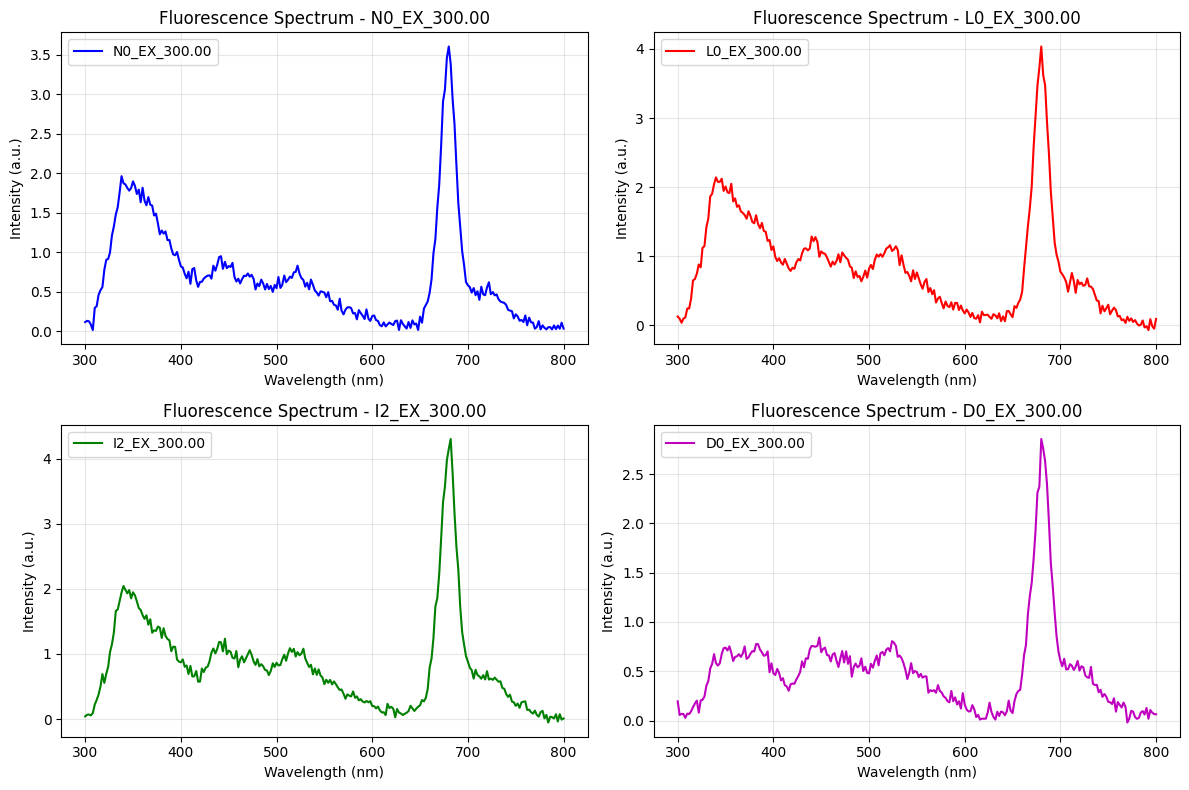


=== SPECTROSCOPIC DATA STATISTICS ===
Number of wavelength points: 251
Wavelength step: 2.03 nm
Peak intensity: 3.6030 a.u. at 682.0 nm


In [8]:
# Step 5b: Proper spectroscopic data visualization (FIXED)
if data_files and 'df' in locals():
    print("=== SPECTROSCOPIC DATA ANALYSIS ===")
    
    # The first row contains headers, so we need to skip it for numerical data
    # Let's examine the structure more carefully
    print(f"Data shape: {df.shape}")
    print(f"First row (headers): {df.iloc[0, :5].tolist()}")
    print(f"Second row (first data): {df.iloc[1, :5].tolist()}")
    
    # Extract wavelength and intensity data properly
    # The data appears to be organized as: Wavelength, Intensity, Wavelength, Intensity, etc.
    wavelengths = []
    intensities = []
    
    # Let's look at the first measurement (first two columns)
    try:
        # Convert to numeric, skipping the header row
        wavelength_col = pd.to_numeric(df.iloc[1:, 0], errors='coerce')
        intensity_col = pd.to_numeric(df.iloc[1:, 1], errors='coerce')
        
        # Remove any NaN values
        valid_mask = ~(wavelength_col.isna() | intensity_col.isna())
        wavelengths = wavelength_col[valid_mask]
        intensities = intensity_col[valid_mask]
        
        print(f"Extracted {len(wavelengths)} valid wavelength-intensity pairs")
        print(f"Wavelength range: {wavelengths.min():.1f} - {wavelengths.max():.1f} nm")
        print(f"Intensity range: {intensities.min():.4f} - {intensities.max():.4f} a.u.")
        
    except Exception as e:
        print(f"Error processing data: {e}")
        wavelengths = []
        intensities = []
    
    # Create proper spectroscopic plot
    if len(wavelengths) > 0:
        plt.figure(figsize=(12, 8))
        
        # Plot the first measurement
        plt.subplot(2, 2, 1)
        plt.plot(wavelengths, intensities, 'b-', linewidth=1.5, label='N0_EX_300.00')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Intensity (a.u.)')
        plt.title('Fluorescence Spectrum - N0_EX_300.00')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Try to plot a few more measurements if available
        if df.shape[1] >= 4:
            try:
                # Second measurement (columns 2-3)
                wavelength_col2 = pd.to_numeric(df.iloc[1:, 2], errors='coerce')
                intensity_col2 = pd.to_numeric(df.iloc[1:, 3], errors='coerce')
                valid_mask2 = ~(wavelength_col2.isna() | intensity_col2.isna())
                
                plt.subplot(2, 2, 2)
                plt.plot(wavelength_col2[valid_mask2], intensity_col2[valid_mask2], 'r-', linewidth=1.5, label='L0_EX_300.00')
                plt.xlabel('Wavelength (nm)')
                plt.ylabel('Intensity (a.u.)')
                plt.title('Fluorescence Spectrum - L0_EX_300.00')
                plt.legend()
                plt.grid(True, alpha=0.3)
            except:
                pass
        
        if df.shape[1] >= 6:
            try:
                # Third measurement (columns 4-5)
                wavelength_col3 = pd.to_numeric(df.iloc[1:, 4], errors='coerce')
                intensity_col3 = pd.to_numeric(df.iloc[1:, 5], errors='coerce')
                valid_mask3 = ~(wavelength_col3.isna() | intensity_col3.isna())
                
                plt.subplot(2, 2, 3)
                plt.plot(wavelength_col3[valid_mask3], intensity_col3[valid_mask3], 'g-', linewidth=1.5, label='I2_EX_300.00')
                plt.xlabel('Wavelength (nm)')
                plt.ylabel('Intensity (a.u.)')
                plt.title('Fluorescence Spectrum - I2_EX_300.00')
                plt.legend()
                plt.grid(True, alpha=0.3)
            except:
                pass
        
        if df.shape[1] >= 8:
            try:
                # Fourth measurement (columns 6-7)
                wavelength_col4 = pd.to_numeric(df.iloc[1:, 6], errors='coerce')
                intensity_col4 = pd.to_numeric(df.iloc[1:, 7], errors='coerce')
                valid_mask4 = ~(wavelength_col4.isna() | intensity_col4.isna())
                
                plt.subplot(2, 2, 4)
                plt.plot(wavelength_col4[valid_mask4], intensity_col4[valid_mask4], 'm-', linewidth=1.5, label='D0_EX_300.00')
                plt.xlabel('Wavelength (nm)')
                plt.ylabel('Intensity (a.u.)')
                plt.title('Fluorescence Spectrum - D0_EX_300.00')
                plt.legend()
                plt.grid(True, alpha=0.3)
            except:
                pass
        
        plt.tight_layout()
        plt.show()
        
        # Show data statistics
        print("\n=== SPECTROSCOPIC DATA STATISTICS ===")
        print(f"Number of wavelength points: {len(wavelengths)}")
        print(f"Wavelength step: {wavelengths.iloc[1] - wavelengths.iloc[0]:.2f} nm")
        print(f"Peak intensity: {intensities.max():.4f} a.u. at {wavelengths.iloc[intensities.idxmax()]:.1f} nm")
        
    else:
        print("Could not extract valid spectroscopic data for plotting")
        
        # Fallback: show raw data structure
        plt.figure(figsize=(12, 6))
        plt.plot(df.iloc[1:100, 0], label='First column (raw)')
        plt.plot(df.iloc[1:100, 1], label='Second column (raw)')
        plt.title('Raw Data (First 100 rows)')
        plt.xlabel('Row Index')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

In [9]:
# Step 6: Summary of findings
print("=== DATA EXPLORATION SUMMARY ===")
print(f"Total data files found: {len(data_files)}")
print(f"Data extracted from: {zip_file}")
print(f"Extraction location: {extract_path}")

if data_files:
    print("\nFile types found:")
    extensions = set()
    for file_path in data_files:
        ext = os.path.splitext(file_path)[1]
        extensions.add(ext)
    for ext in sorted(extensions):
        count = len([f for f in data_files if f.endswith(ext)])
        print(f"  {ext}: {count} files")

print("\nNext steps:")
print("1. Understand the data format and structure")
print("2. Identify which files contain spectral data")
print("3. Load and preprocess the relevant data")
print("4. Build classification models")

=== DATA EXPLORATION SUMMARY ===
Total data files found: 222
Data extracted from: ./data/Raw_data.zip
Extraction location: ./data/extracted

File types found:
  .csv: 222 files

Next steps:
1. Understand the data format and structure
2. Identify which files contain spectral data
3. Load and preprocess the relevant data
4. Build classification models
